In [1]:
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.preprocessing import MinMaxScaler

In [2]:
df = pd.read_csv('airbnb.csv')

In [3]:
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


In [4]:
df = df.drop(["name","host_id","host_name","last_review","reviews_per_month","neighbourhood","id"],axis=1)

#df=df.drop(["last_review","reviews_per_month"],axis=1)

In [5]:
df

,neighbourhood_group,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,Brooklyn,40.64749,-73.97237,Private room,149,1,9,6,365
1,Manhattan,40.75362,-73.98377,Entire home/apt,225,1,45,2,355
2,Manhattan,40.80902,-73.94190,Private room,150,3,0,1,365
3,Brooklyn,40.68514,-73.95976,Entire home/apt,89,1,270,1,194
4,Manhattan,40.79851,-73.94399,Entire home/apt,80,10,9,1,0
...,...,...,...,...,...,...,...,...,...
48890,Brooklyn,40.67853,-73.94995,Private room,70,2,0,2,9
48891,Brooklyn,40.70184,-73.93317,Private room,40,4,0,2,36
48892,Manhattan,40.81475,-73.94867,Entire home/apt,115,10,0,1,27
48893,Manhattan,40.75751,-73.99112,Shared room,55,1,0,6,2


In [6]:
print(df.isnull().sum())

neighbourhood_group               0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64


In [7]:
df.neighbourhood_group.unique()
#5 kategori var burda dikkat et.

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [8]:
pastaDagilimi = df["neighbourhood_group"].value_counts()

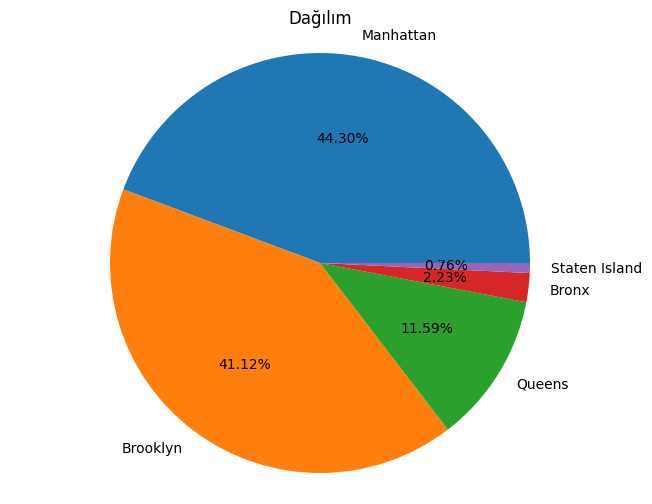

In [9]:
plt.figure(figsize=(8, 6))
plt.pie(pastaDagilimi, labels=pastaDagilimi.index,
     autopct='%.2f%%')
plt.title('Dağılım')
plt.axis('equal')  # Eşit eksen oranı için
plt.show()

In [10]:
df =pd.get_dummies(df, columns=['neighbourhood_group'])

In [11]:
df

,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island
0,40.64749,-73.97237,Private room,149,1,9,6,365,False,True,False,False,False
1,40.75362,-73.98377,Entire home/apt,225,1,45,2,355,False,False,True,False,False
2,40.80902,-73.94190,Private room,150,3,0,1,365,False,False,True,False,False
3,40.68514,-73.95976,Entire home/apt,89,1,270,1,194,False,True,False,False,False
4,40.79851,-73.94399,Entire home/apt,80,10,9,1,0,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,40.67853,-73.94995,Private room,70,2,0,2,9,False,True,False,False,False
48891,40.70184,-73.93317,Private room,40,4,0,2,36,False,True,False,False,False
48892,40.81475,-73.94867,Entire home/apt,115,10,0,1,27,False,False,True,False,False
48893,40.75751,-73.99112,Shared room,55,1,0,6,2,False,False,True,False,False


In [12]:
le = LabelEncoder()
df["neighbourhood_group_Bronx"] = le.fit_transform(df["neighbourhood_group_Bronx"])
df["neighbourhood_group_Brooklyn"] = le.fit_transform(df["neighbourhood_group_Brooklyn"])
df["neighbourhood_group_Manhattan"] = le.fit_transform(df["neighbourhood_group_Manhattan"])
df["neighbourhood_group_Queens"] = le.fit_transform(df["neighbourhood_group_Queens"])
df["neighbourhood_group_Staten Island"] = le.fit_transform(df["neighbourhood_group_Staten Island"])

In [13]:
df

,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island
0,40.64749,-73.97237,Private room,149,1,9,6,365,0,1,0,0,0
1,40.75362,-73.98377,Entire home/apt,225,1,45,2,355,0,0,1,0,0
2,40.80902,-73.94190,Private room,150,3,0,1,365,0,0,1,0,0
3,40.68514,-73.95976,Entire home/apt,89,1,270,1,194,0,1,0,0,0
4,40.79851,-73.94399,Entire home/apt,80,10,9,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,40.67853,-73.94995,Private room,70,2,0,2,9,0,1,0,0,0
48891,40.70184,-73.93317,Private room,40,4,0,2,36,0,1,0,0,0
48892,40.81475,-73.94867,Entire home/apt,115,10,0,1,27,0,0,1,0,0
48893,40.75751,-73.99112,Shared room,55,1,0,6,2,0,0,1,0,0


In [14]:
df =pd.get_dummies(df, columns=['room_type'])


In [15]:
df

,latitude,longitude,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
0,40.64749,-73.97237,149,1,9,6,365,0,1,0,0,0,False,True,False
1,40.75362,-73.98377,225,1,45,2,355,0,0,1,0,0,True,False,False
2,40.80902,-73.94190,150,3,0,1,365,0,0,1,0,0,False,True,False
3,40.68514,-73.95976,89,1,270,1,194,0,1,0,0,0,True,False,False
4,40.79851,-73.94399,80,10,9,1,0,0,0,1,0,0,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,40.67853,-73.94995,70,2,0,2,9,0,1,0,0,0,False,True,False
48891,40.70184,-73.93317,40,4,0,2,36,0,1,0,0,0,False,True,False
48892,40.81475,-73.94867,115,10,0,1,27,0,0,1,0,0,True,False,False
48893,40.75751,-73.99112,55,1,0,6,2,0,0,1,0,0,False,False,True


In [16]:
le = LabelEncoder()
df["room_type_Entire home/apt"] = le.fit_transform(df["room_type_Entire home/apt"])
df["room_type_Private room"] = le.fit_transform(df["room_type_Private room"])
df["room_type_Shared room"] = le.fit_transform(df["room_type_Shared room"])


In [17]:
df

,latitude,longitude,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
0,40.64749,-73.97237,149,1,9,6,365,0,1,0,0,0,0,1,0
1,40.75362,-73.98377,225,1,45,2,355,0,0,1,0,0,1,0,0
2,40.80902,-73.94190,150,3,0,1,365,0,0,1,0,0,0,1,0
3,40.68514,-73.95976,89,1,270,1,194,0,1,0,0,0,1,0,0
4,40.79851,-73.94399,80,10,9,1,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,40.67853,-73.94995,70,2,0,2,9,0,1,0,0,0,0,1,0
48891,40.70184,-73.93317,40,4,0,2,36,0,1,0,0,0,0,1,0
48892,40.81475,-73.94867,115,10,0,1,27,0,0,1,0,0,1,0,0
48893,40.75751,-73.99112,55,1,0,6,2,0,0,1,0,0,0,0,1


<Axes: xlabel='latitude'>

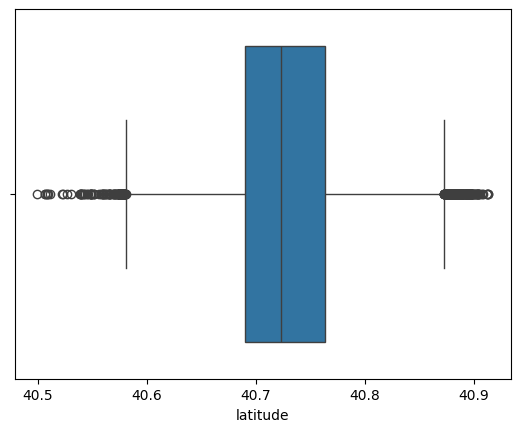

In [18]:
# Seaborn kullanarak boxplot oluşturma
sns.boxplot(x='latitude', data=df)
# latitude da aykırı değer var.

In [19]:
# Aykırı değerleri tespit etme
Q1 = df['latitude'].quantile(0.25)
Q3 = df['latitude'].quantile(0.75)
IQR = Q3 - Q1

# Aykırı değerleri tanımlama
AltSinir = Q1 - 1.5 * IQR
UstSinir = Q3 + 1.5 * IQR

In [20]:
DuzeltilmisLatitude = []

for latitude in df['latitude']:
    if latitude < AltSinir:
        DuzeltilmisLatitude.append(AltSinir)  # Alt Sınırdan düşük Aykırı değerler Alt Sınır değeri ile eşitleniyor
    elif latitude > UstSinir:
        DuzeltilmisLatitude.append(UstSinir)  # Üst Sınırdan büyük Aykırı değerler Üst Sınır değeri ile eşitleniyor
    else:
        DuzeltilmisLatitude.append(latitude)

df['latitude'] = DuzeltilmisLatitude

<Axes: xlabel='latitude'>

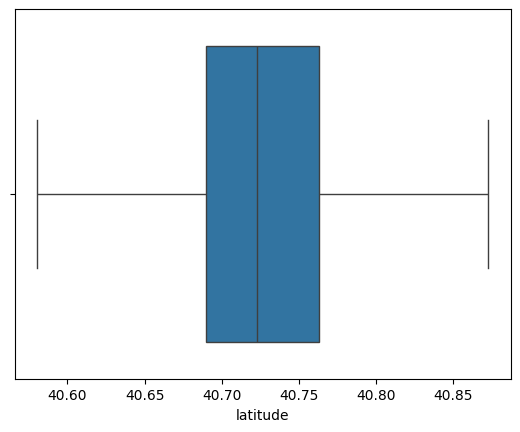

In [21]:
# Seaborn kullanarak boxplot oluşturma
sns.boxplot(x='latitude', data=df)
# latitude da aykırı değer var.

<Axes: xlabel='longitude'>

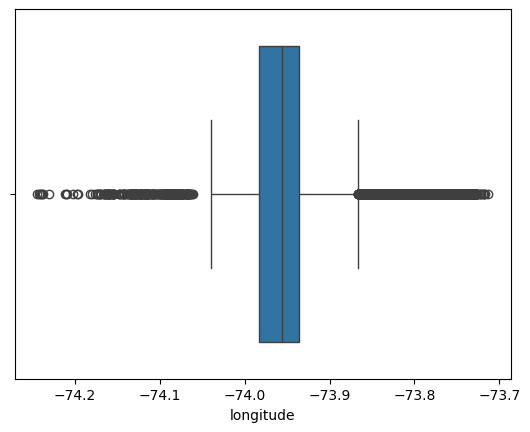

In [22]:
sns.boxplot(x='longitude', data=df)

In [23]:
# Aykırı değerleri tespit etme
Q1 = df['longitude'].quantile(0.25)
Q3 = df['longitude'].quantile(0.75)
IQR = Q3 - Q1

# Aykırı değerleri tanımlama
AltSinir = Q1 - 1.5 * IQR
UstSinir = Q3 + 1.5 * IQR

In [24]:
DuzeltilmisLongitude = []

for longitude in df['longitude']:
    if longitude < AltSinir:
        DuzeltilmisLongitude.append(AltSinir)  # Alt Sınırdan düşük Aykırı değerler Alt Sınır değeri ile eşitleniyor
    elif longitude > UstSinir:
        DuzeltilmisLongitude.append(UstSinir)  # Üst Sınırdan büyük Aykırı değerler Üst Sınır değeri ile eşitleniyor
    else:
        DuzeltilmisLongitude.append(longitude)

df['longitude'] = DuzeltilmisLongitude

<Axes: xlabel='longitude'>

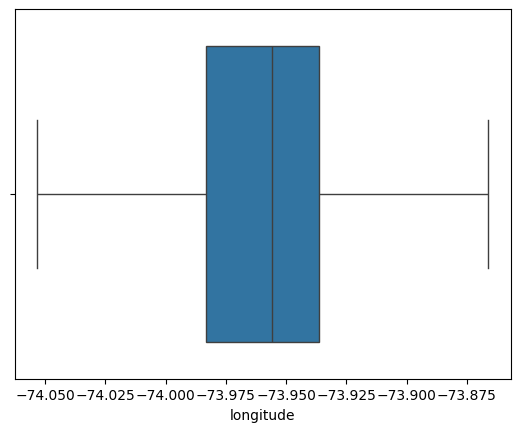

In [25]:
sns.boxplot(x='longitude', data=df)

In [26]:
df

,latitude,longitude,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
0,40.64749,-73.97237,149,1,9,6,365,0,1,0,0,0,0,1,0
1,40.75362,-73.98377,225,1,45,2,355,0,0,1,0,0,1,0,0
2,40.80902,-73.94190,150,3,0,1,365,0,0,1,0,0,0,1,0
3,40.68514,-73.95976,89,1,270,1,194,0,1,0,0,0,1,0,0
4,40.79851,-73.94399,80,10,9,1,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,40.67853,-73.94995,70,2,0,2,9,0,1,0,0,0,0,1,0
48891,40.70184,-73.93317,40,4,0,2,36,0,1,0,0,0,0,1,0
48892,40.81475,-73.94867,115,10,0,1,27,0,0,1,0,0,1,0,0
48893,40.75751,-73.99112,55,1,0,6,2,0,0,1,0,0,0,0,1


<Axes: xlabel='price'>

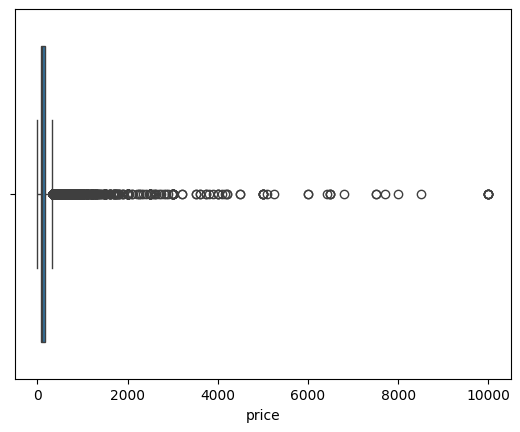

In [53]:
sns.boxplot(x='price', data=df)

In [55]:
# Aykırı değerleri tespit etme
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

# Aykırı değerleri tanımlama
AltSinir = Q1 - 1.5 * IQR
UstSinir = Q3 + 1.5 * IQR

In [57]:
DuzeltilmisPrice = []

for price in df['price']:
    if price < AltSinir:
        DuzeltilmisPrice.append(AltSinir)  # Alt Sınırdan düşük Aykırı değerler Alt Sınır değeri ile eşitleniyor
    elif price > UstSinir:
        DuzeltilmisPrice.append(UstSinir)  # Üst Sınırdan büyük Aykırı değerler Üst Sınır değeri ile eşitleniyor
    else:
        DuzeltilmisPrice.append(price)

df['price'] = DuzeltilmisPrice

<Axes: xlabel='price'>

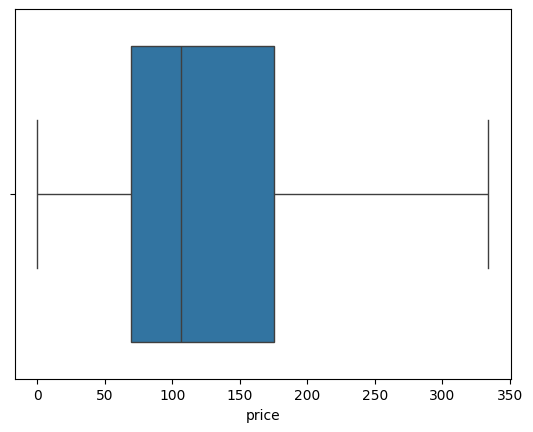

In [59]:
sns.boxplot(x='price', data=df)

<Axes: xlabel='minimum_nights'>

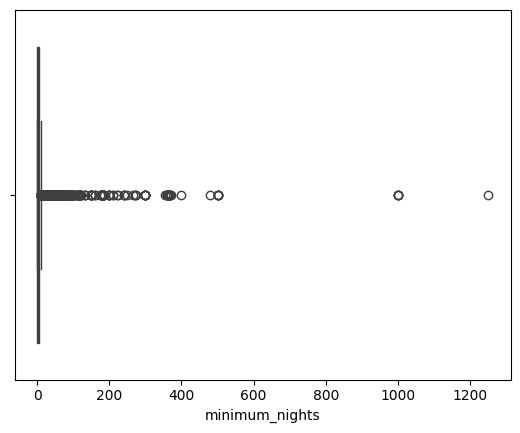

In [61]:
sns.boxplot(x='minimum_nights', data=df)

In [63]:
# Aykırı değerleri tespit etme
Q1 = df['minimum_nights'].quantile(0.25)
Q3 = df['minimum_nights'].quantile(0.75)
IQR = Q3 - Q1

# Aykırı değerleri tanımlama
AltSinir = Q1 - 1.5 * IQR
UstSinir = Q3 + 1.5 * IQR

In [65]:
DuzeltilmisMn = []

for minimum_nights in df['minimum_nights']:
    if minimum_nights < AltSinir:
        DuzeltilmisMn.append(AltSinir)  # Alt Sınırdan düşük Aykırı değerler Alt Sınır değeri ile eşitleniyor
    elif minimum_nights > UstSinir:
        DuzeltilmisMn.append(UstSinir)  # Üst Sınırdan büyük Aykırı değerler Üst Sınır değeri ile eşitleniyor
    else:
        DuzeltilmisMn.append(minimum_nights)

df['minimum_nights'] = DuzeltilmisMn

<Axes: xlabel='minimum_nights'>

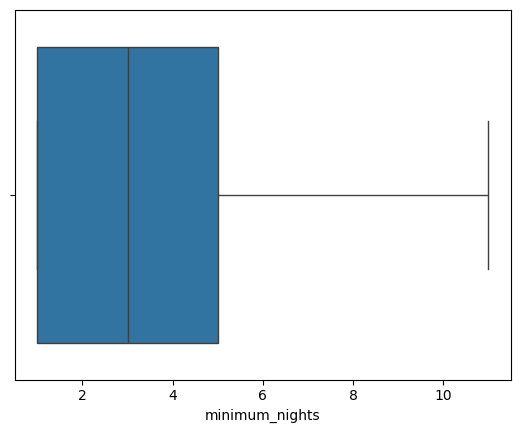

In [67]:
sns.boxplot(x='minimum_nights', data=df)

<Axes: xlabel='number_of_reviews'>

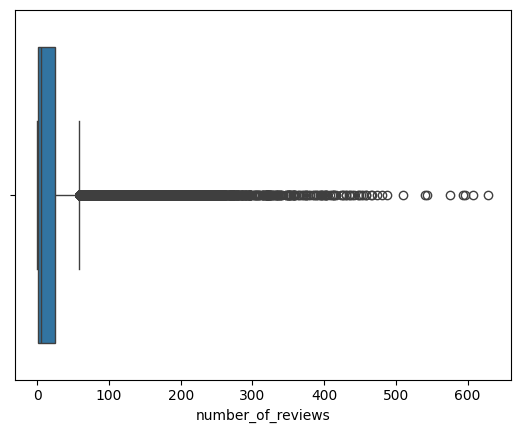

In [69]:
sns.boxplot(x='number_of_reviews', data=df)

In [71]:
# Aykırı değerleri tespit etme
Q1 = df['number_of_reviews'].quantile(0.25)
Q3 = df['number_of_reviews'].quantile(0.75)
IQR = Q3 - Q1

# Aykırı değerleri tanımlama
AltSinir = Q1 - 1.5 * IQR
UstSinir = Q3 + 1.5 * IQR

In [73]:
DuzeltilmisNor = []

for number_of_reviews in df['number_of_reviews']:
    if number_of_reviews < AltSinir:
        DuzeltilmisNor.append(AltSinir)  # Alt Sınırdan düşük Aykırı değerler Alt Sınır değeri ile eşitleniyor
    elif number_of_reviews > UstSinir:
        DuzeltilmisNor.append(UstSinir)  # Üst Sınırdan büyük Aykırı değerler Üst Sınır değeri ile eşitleniyor
    else:
        DuzeltilmisNor.append(number_of_reviews)

df['number_of_reviews'] = DuzeltilmisNor

<Axes: xlabel='number_of_reviews'>

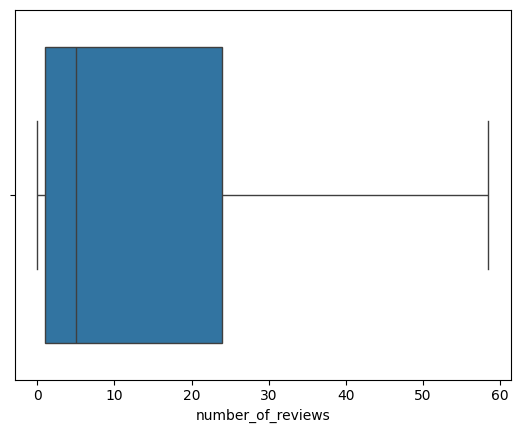

In [75]:
sns.boxplot(x='number_of_reviews', data=df)

<Axes: xlabel='calculated_host_listings_count'>

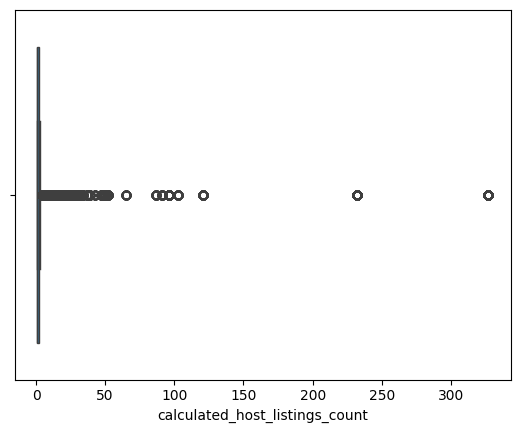

In [77]:
sns.boxplot(x='calculated_host_listings_count', data=df)

In [79]:
# Aykırı değerleri tespit etme
Q1 = df['calculated_host_listings_count'].quantile(0.25)
Q3 = df['calculated_host_listings_count'].quantile(0.75)
IQR = Q3 - Q1

# Aykırı değerleri tanımlama
AltSinir = Q1 - 1.5 * IQR
UstSinir = Q3 + 1.5 * IQR

In [81]:
DuzeltilmisCal = []

for calculated_host_listings_count in df['calculated_host_listings_count']:
    if calculated_host_listings_count < AltSinir:
        DuzeltilmisCal.append(AltSinir)  # Alt Sınırdan düşük Aykırı değerler Alt Sınır değeri ile eşitleniyor
    elif calculated_host_listings_count > UstSinir:
        DuzeltilmisCal.append(UstSinir)  # Üst Sınırdan büyük Aykırı değerler Üst Sınır değeri ile eşitleniyor
    else:
        DuzeltilmisCal.append(calculated_host_listings_count)

df['calculated_host_listings_count'] = DuzeltilmisCal

<Axes: xlabel='calculated_host_listings_count'>

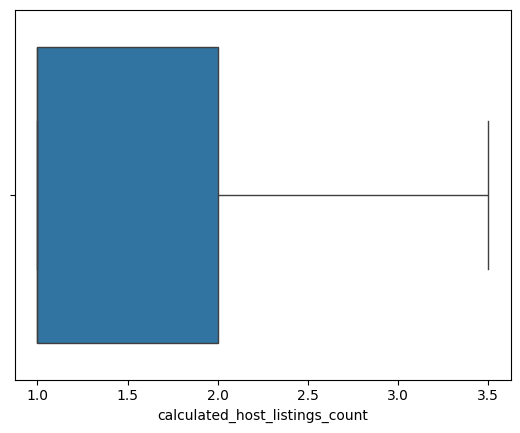

In [83]:
sns.boxplot(x='calculated_host_listings_count', data=df)

<Axes: xlabel='availability_365'>

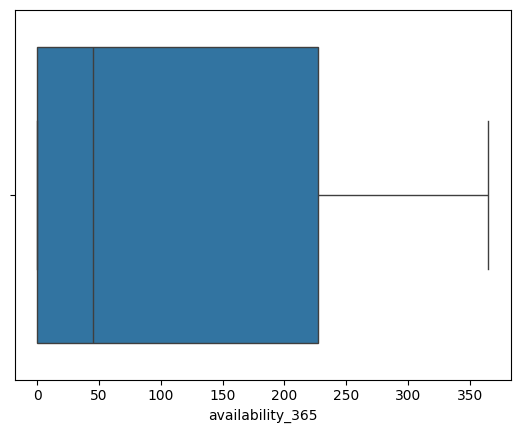

In [85]:
sns.boxplot(x='availability_365', data=df)

In [87]:
#NORMALİZASYON işlemi yapıcaz.
for data in df:
    minDeger = df[data].min()
    maxDeger = df[data].max()
    # Min-Max Normalizasyon işlemi
    df[data] = (df[data] - minDeger) / (maxDeger - minDeger)

In [89]:
df

,latitude,longitude,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
0,0.229105,0.432164,0.446108,0.0,0.153846,1.0,1.000000,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.592490,0.371260,0.673653,0.0,0.769231,0.4,0.972603,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,0.782177,0.594949,0.449102,0.2,0.000000,0.0,1.000000,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.358017,0.499533,0.266467,0.0,1.000000,0.0,0.531507,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.746191,0.583783,0.239521,0.9,0.153846,0.0,0.000000,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,0.335385,0.551942,0.209581,0.1,0.000000,0.4,0.024658,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
48891,0.415197,0.641588,0.119760,0.3,0.000000,0.4,0.098630,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
48892,0.801796,0.558780,0.344311,0.9,0.000000,0.0,0.073973,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
48893,0.605809,0.331993,0.164671,0.0,0.000000,1.0,0.005479,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [91]:
# Bağımsız değişkenler (özellikler) ve bağımlı değişken (hedef) seçelim
X = df.drop('price', axis=1)  # Özellikler (bağımsız değişkenler)
y = df['price']  # Hedef değişken (bağımlı değişken)

# Veri setini eğitim ve test olarak bölelim
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Modeli oluşturma
model = LinearRegression()

# Modeli eğitim verisiyle eğitelim
model.fit(X_train, y_train)

# Modelin eğim (coef_) ve y ekseni kesişimini (intercept_) görüntüleyelim
print("Eğim (coef_):", model.coef_)
print("Y ekseni kesişimi (intercept_):", model.intercept_)

Eğim (coef_): [-1.24255850e-02 -3.20761894e-01 -9.34911836e-02 -7.03024358e-02
  3.89767245e-03  1.20198583e-01 -1.20443818e+12 -1.20443818e+12
 -1.20443818e+12 -1.20443818e+12 -1.20443818e+12  7.22114839e+10
  7.22114839e+10  7.22114839e+10]
Y ekseni kesişimi (intercept_): 1132226693713.804


In [93]:
# Test verisiyle tahmin yapalım
y_pred = model.predict(X_test)

# Tahminin ilk 5 değerini görelim
print("Tahminler:", y_pred[:5])

Tahminler: [0.51123047 0.13183594 0.34033203 0.7487793  0.49829102]


In [95]:
# Ortalama Kare Hata (MSE)
mse = mean_squared_error(y_test, y_pred)

# R-kare (R²) skoru
r2 = r2_score(y_test, y_pred)

# Sonuçları yazdıralım
print(f"Ortalama Kare Hata (MSE): {mse}")
print(f"R-kare (R²) Skoru: {r2}")

Ortalama Kare Hata (MSE): 0.032115556383724986
R-kare (R²) Skoru: 0.4791511522619295


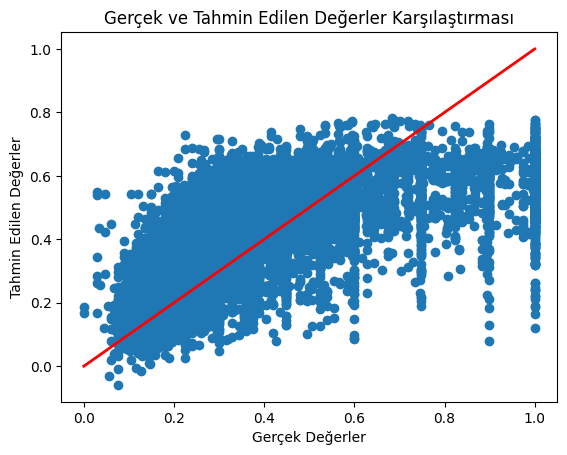

In [97]:
# Gerçek ve tahmin edilen değerleri karşılaştırma
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
plt.xlabel("Gerçek Değerler")
plt.ylabel("Tahmin Edilen Değerler")
plt.title("Gerçek ve Tahmin Edilen Değerler Karşılaştırması")
plt.show()

In [120]:
from sklearn.tree import DecisionTreeRegressor

# Karar ağacı modeli oluştur ve eğit
model = DecisionTreeRegressor(max_depth=6, random_state=42)
model.fit(X_train, y_train)

# Test setinde tahmin yap
y_pred = model.predict(X_test)

Mean Squared Error (MSE): 0.03
R² Skoru: 0.52


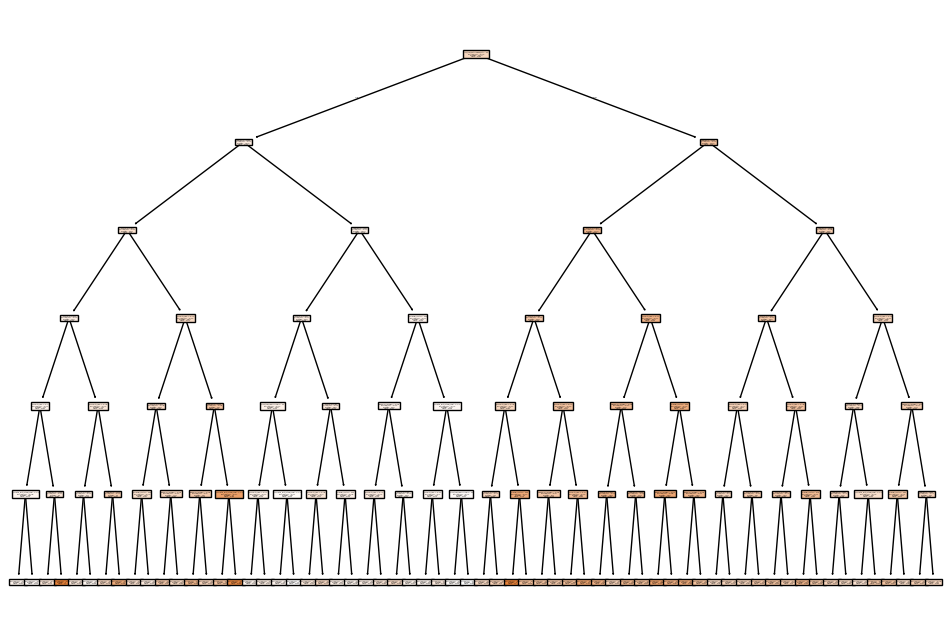

In [122]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# MSE hesaplama
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse:.2f}")

# R² hesaplama
r2 = r2_score(y_test, y_pred)
print(f"R² Skoru: {r2:.2f}")

# Karar ağacı yapısını görselleştir
plt.figure(figsize=(12, 8))
plot_tree(model, feature_names=X.columns, filled=True)
plt.show()